In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
data=pd.read_csv("HR_comma_sep.csv")

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
left=data[data.left==1]
noleft=data[data.left==0]

In [13]:
nd=data.groupby('left')

In [15]:
nd.mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_14392\1091043714.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nd.mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

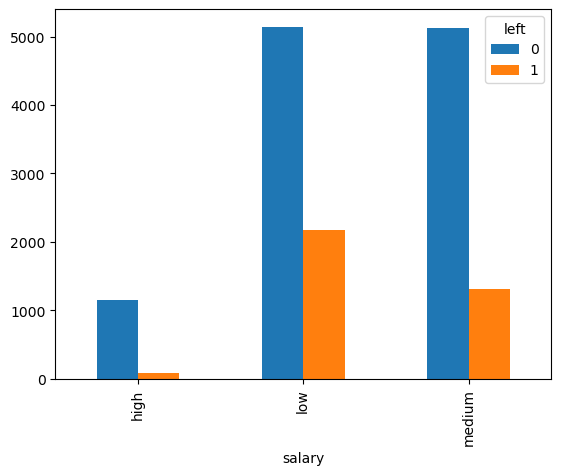

In [17]:
#Q2
pd.crosstab(data.salary,data.left).plot(kind='bar')

In [19]:
newdata=data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
saldum=pd.get_dummies(newdata.salary,prefix='salary')

In [20]:
newdatad=pd.concat([newdata,saldum],axis='columns')
newdatad.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [31]:
newdatad.drop(['salary'],axis='columns',inplace=True)

In [32]:
X=newdatad
y=data.left

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.3)

In [34]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [35]:
reg.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
reg.score(X_test,y_test)

0.7755238095238095

In [37]:
reg.predict_proba(X_test)

array([[0.81679102, 0.18320898],
       [0.36265407, 0.63734593],
       [0.30638158, 0.69361842],
       ...,
       [0.81663458, 0.18336542],
       [0.89477657, 0.10522343],
       [0.7169675 , 0.2830325 ]])